(tema:2)=
# Tema 2: Data-matricer og Dimensionsreduktion

I dette tema-projekt skal vi arbejde med "data"-matricer i NumPy og en metode der hedder [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis). **Principal Component Analysis (PCA)** er en matematisk (statistisk) metode, der bruges til at reducere dimensionen af data. Metoden prøver at identificere de vigtigste variationer i et datasæt ved at omdanne de oprindelige variabler til nye, uafhængige "komponenter". I "Matematik 1b-sprog" finder vi en ny ortonormal basis, udvælger de vigtigste basis-retninger og projicere dataene ned på underrummet udspændt af disse basis-vektorer. Dette gør det lettere at visualisere og analysere kompliceret data. PCA er især nyttig, når man arbejder med store datamængder med mange variable men hvor den essentielle information i dataet *kan* beskrives med få variable, da det kan hjælpe med at identificere de mest relevante egenskaber og reducere "støj" i data. 

Før vi kan kigge på metoden, skal vi først lære at lave matrix-operationer i NumPy -- det opfører sig nemlig anderledes end SymPy. **NumPy** (Numerical Python) er en Python-pakke, der gør det nemt at arbejde med numeriske data. Det er uundværligt for ingeniørstuderende, da det giver effektive værktøjer til matematik, statistik og dataanalyse. Den kan blive nyttig i gruppeprojektet senere i kurset, og vi introducere den derfor i denne tema-øvelse. 
<!-- Måske du allerede har installeret NumPy, fx i *02002 Programmering*, men hvis du ikke allerede har NumPy installeret, kan du bruge kommandoen `conda install numpy` for at installere det. --> 
NumPy indeholder en central datastruktur kaldet “array”, som er en n-dimensionel "container" til tal. Vi vil opfatte disse arrays som matricer og vektorer. 

Med "data-matricer" forstår vi blot matricer med decimaltal (dvs. numeriske matricer), der ofte repræsenterer fysiske størrelser, fx en $n \times 2$ matrix $X$ med to søjler der angiver hhv. højde og vægt af $n$ forsøgspersoner. Det er ikke formålet med opgaven at vi skal udlede PCA-metoden eller forstå den fra et statistisk perspektiv. Vi vil derimod anvende den til at "forstå" vores data og illustrere koncepterne egenvektor-basis og ortogonale projektioner for datasæt.  

Tema-øvelsen er opbygget af følgende trin:

1. Matrix-regning i SymPy, NumPy og Maple
1. Import af datasæt og visualiseringer
1. PCA af datasæt i 2D
1. Lav dit eget datasæt i højere dimensioner

## Matrix-operationer i computer software

Vi kigger først på forskellige matrix-operationer i SymPy, NumPy og Maple for matricer og vektorer af små størrelser. Nogle af matrix operationerne kender vi fra matematikken, fx matrix-matrix multiplikation, matrix addition, osv. men andre (især i NumPy) er helt nye. Man kan hurtigt komme til at lave noget i NumPy som ikke giver mening, og det er derfor en god ide at kontrollere sin kode for små eksempler, hvor man kan tjekke udregningerne i hånden.

In [14]:
from sympy import Matrix, init_printing
import numpy as np
import matplotlib.pyplot as plt
init_printing()

Du skal først definere $A \in \mathbb{R}^{3 \times 3}$ og $\pmb{x} \in \mathbb{R}^{3 \times 1}$ i de 3 programmer. SymPy og NumPy kan du bruge i samme notebook; Maple-koden må du copy-paste til Maple:

I SymPy:

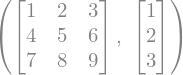

In [15]:
A = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x = Matrix([1, 2, 3])
A , x

I NumPy:

In [16]:
A_np = np.array(A, dtype=float) # array bruges i NumPy til at lave matricer
x_np = np.array([1, 2, 3], dtype=float)
A_np, x_np

(array([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]),
 array([1., 2., 3.]))

I Maple (worksheet mode):

```{code}
> with(LinearAlgebra):
> A := Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]]);
> x := Transpose(Matrix([1, 2, 3]));
```

### Spørgsmål a

Udfør matrix-vektor multiplikationen $A\pmb{x}$ i SymPy, NumPy og Maple. Matrix-vektor og derfor matrix-matrix multiplikation udføres med *forskellig syntax* i alle tre programmer, men er enten `*` (asterisk), `.` (punktum) eller `@` (snabel-a)

In [17]:
A*x, A_np @ x_np

(Matrix([
 [14],
 [32],
 [50]]),
 array([14., 32., 50.]))

### Spørgsmål b

Udtrykket $A + 2$ har ingen matematisk definition -- det giver altså ikke mening matematisk. Undersøg om det giver mening i SymPy, NumPy og Maple, eller om man får en fejl. 

Igen opfører alle tre programmer SymPy, NumPy og Maple sig forskelligt. Diskuter hvilket program I synes opfører sig mest hensigtsmæssigt.

In [18]:
A + 2  # throws "unsupported operand type(s) for +: 'MutableDenseMatrix' and 'int'"

TypeError: unsupported operand type(s) for +: 'MutableDenseMatrix' and 'int'

In [19]:
A_np + 2 # Adds 2 to all elements

array([[ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

Sympy giver en fejl der angiver, at denne matematiske opperation ikke giver mening med en matrix af denne størelse. Derimod, da numpy laver matrix om til en array opføre det sig således, så alle index bliver adderet med 2. Jeg vil derfor argumenterer at sympy håndtere det bedre hvis man arbejder strikt med matrix operationer.

### Spørgsmål c

NumPy opfører sig ofte ligesom SymPy (og Maple), fx mht transponering:

In [20]:
A.T, A_np.T

(Matrix([
 [1, 4, 7],
 [2, 5, 8],
 [3, 6, 9]]),
 array([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]]))

men NumPy kan lave mange andre smarte manipulationer med arrays. Det betyder også man skal passe ikke at lave fejl. Vigtigt er det at vide at NumPy ikke kender forskel på række- og søjle-vektorer: alle vektorer i NumPy er 1-dimensionale. Man derfor ikke sige om det er en vektor der "står op" eller "ligger ned", og det har derfor ingen effekt at transponere en vektor i NumPy. Dette kan ses ved at `x_np` er af størrelsen "3", ikke "(3,1)" eller "(1,3)":

In [21]:
A_np.shape, x_np.shape

I det følgende skal du forklare hvordan/hvad NumPy udregner, og hvordan du ville opskrive det matematisk eller i SymPy (hvis det overhovedet er muligt):

In [22]:
x_np @ x_np, x_np.dot(x_np)

In [23]:
# Dette svare til
x.T * x, x.dot(x)

In [24]:
A_np.dot(x_np)

array([14., 32., 50.])

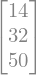

In [25]:
# Dette svare til
A * x

In [26]:
x_np @ A_np

array([30., 36., 42.])

In [27]:
# Dette svare til
x.T * A

In [28]:
A_np * x_np, x_np * A_np

(array([[ 1.,  4.,  9.],
        [ 4., 10., 18.],
        [ 7., 16., 27.]]),
 array([[ 1.,  4.,  9.],
        [ 4., 10., 18.],
        [ 7., 16., 27.]]))

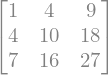

In [29]:
# Begge svare til
x_broadcasted = Matrix([x.T, x.T, x.T])
A.multiply_elementwise(x_broadcasted)

### Spørgsmål d

Når vi laver ortogonale projektioner på linjer som i uge 3, har vi ofte brug for at danne en $n \times n$ projektionsmatrix ud fra matrix-matrix produktet af en $n \times 1$ søjlevektor og en $1 \times n$ rækkevektor. I SymPy ville vi gøre:

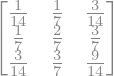

In [30]:
u = x / x.norm()
u * u.T

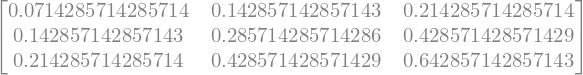

In [31]:
_.evalf()   # som decimaltal

Hvordan ville du gøre dette i NumPy? Hvorfor virker følgende ikke?

In [32]:
u_np = x_np / np.linalg.norm(x_np)
u_np.reshape(-1,1) @ u_np.reshape(1, -1)

array([[0.07142857, 0.14285714, 0.21428571],
       [0.14285714, 0.28571429, 0.42857143],
       [0.21428571, 0.42857143, 0.64285714]])

```{hint}
:class: dropdown
Vektorer er 1-dimensionale arrays i NumPy så transponering har ingen effekt. Man kan bruge `.reshape(n,m)` tage at lave disse arrays om til en "to-dimensionale" matricer. 
```

```{hint}
:class: dropdown
Fx `u_np.reshape(3, 1)` og `u_np.reshape(1, 3)`. Mere generelt kan man bruge `.reshape(-1, 1)` og `.reshape(1, -1)`, hvor vi skrive `-1` i stedet for længden af vektoren.  
```

## Import af Datasæt og Visualiseringer

### Spørgsmål e

Download filen <a href="../_assets/weight-height.csv">weight-height.csv</a>. Data-filen er fra [Kaggle](https://www.kaggle.com/code/martandsay/height-weight-regression-classification) og kan også downloads der. Importer CSV-filen i NumPy ved følgende kommando

In [33]:
# Load the CSV file into a NumPy array
data = np.genfromtxt('weight-height.csv', delimiter=',', dtype=[('Gender', 'U10'), ('Height', float), ('Weight', float)], names=True)

# Access the columns by their names
gender = data['Gender']
height = data['Height']
weight = data['Weight']

# Print the data
# print(data.dtype)
print(gender)
print(height)
print(weight)

['"Male"' '"Male"' '"Male"' ... '"Female"' '"Female"' '"Female"']
[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]
[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


### Spørgsmål f

Forklar følgende plot. Hvad svarer hver punkt/kryds til?

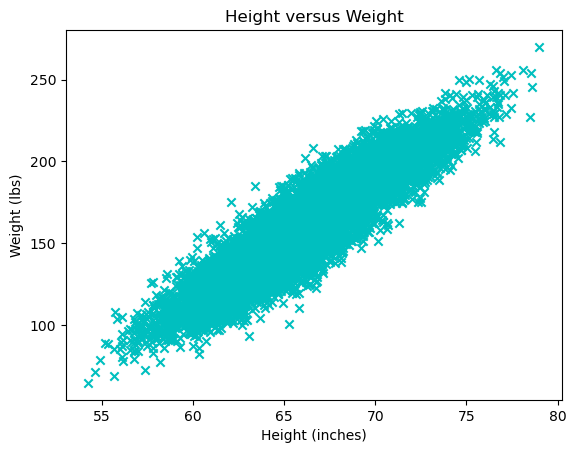

In [34]:
plt.scatter(x=height, y=weight, color='c', marker='x')
plt.title("Height versus Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.plot()

Plottet viser højde mod vægt, så hver point viser en person med en højde og deres tilsvarende vægt.

### Spørgsmål g

Forklar hvad følgende data-matrix indeholder:

In [35]:
X = np.array([height, weight]).T
X.shape

In [36]:
# de 10 første rækker
X[0:10,:]   # eller blot X[:10]

array([[ 73.84701702, 241.89356318],
       [ 68.78190405, 162.31047252],
       [ 74.11010539, 212.74085556],
       [ 71.7309784 , 220.0424703 ],
       [ 69.88179586, 206.34980062],
       [ 67.25301569, 152.21215576],
       [ 68.78508125, 183.9278886 ],
       [ 68.34851551, 167.97111049],
       [ 67.01894966, 175.9294404 ],
       [ 63.45649398, 156.39967639]])

Dette er en matrix fyldt med personer og deres (højde,vægt)

### Spørgsmål h

Skriv en Python funktion der udregner gennemsnit af *hver* søjle i $X$-matricen:

In [37]:
def average_of_each_column(X: np.array) -> np.array:
    return np.mean(X, axis=0)

In [38]:
average_of_each_column(X)

array([ 66.36755975, 161.44035683])

Output (efter `return`) skal være et NumPy array med `shape` (2,), altså en middelværdi-vektor af længde 2. Tjek din funktion med kaldet:

```{code} ipython3
X - average_of_each_column(X)
```

```{hint}
:class: dropdown
Det letteste er at bruge en indbygget metode. Se https://numpy.org/doc/stable/reference/generated/numpy.mean.html
```

In [39]:
def average_of_each_column(X):
    return X.mean(axis=0)

### Spørgsmål i

Vi skal nu standardisere dataet, hvilket i denne opgave blot består i at centrere punktængden ("data-skyen") i $(0,0)$. Mere præcist: I hver søjle af $X$ skal fra hvert element i søjlen fratrækkes søjlens gennemsnit. I Python blot:

In [40]:
def centered(X):
    return X - average_of_each_column(X) # 'broadcasting' the vector as we saw above

X_st = centered(X)

Plot det nye standardiserede datasæt $X_{st}$ og tjek at det er centreret omkring $(0,0)$.

*Hint*: Husk at datasættet $X$ kan plottes ved:

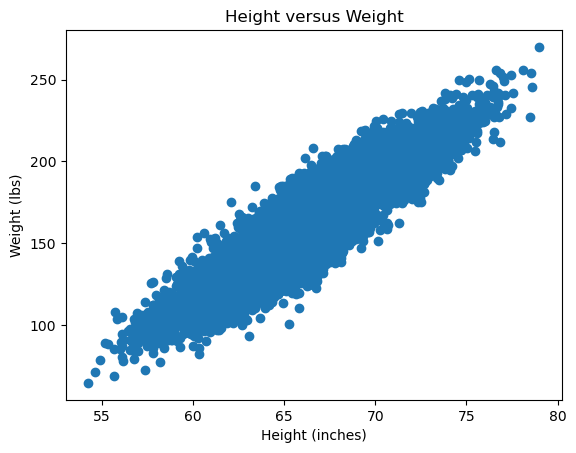

In [41]:
plt.scatter(X[:,0], X[:,1]) # X[:,0] er højde og X[:,1] er vægt
plt.title("Height versus Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.plot()

Du skal blot gøre det samme for $X_{st}$.

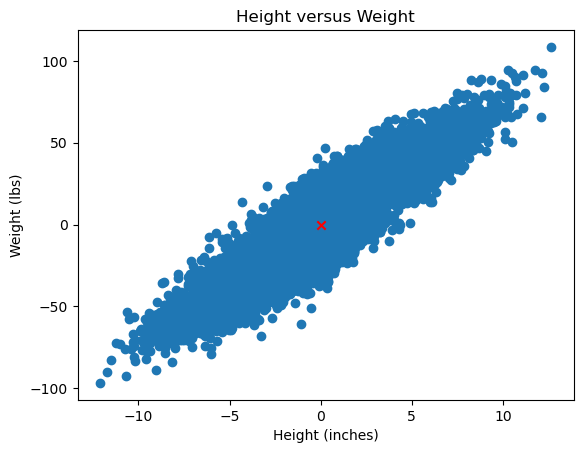

In [42]:
plt.figure()
plt.scatter(X_st[:,0], X_st[:,1])
plt.title("Height versus Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")

# point at (0,0)
plt.scatter(0, 0, color='r', marker='x')

plt.plot()


## Kovariansmatrix

### Spørgsmål j

Vi vender lige tilbage til matematikken for en kort stund og beder jer bevise følgende:

Lad $X$ være en vilkårlig reel $n \times k$-matrix. Bevis at $k \times k$-matricen $C$ givet ved $C = X^T X$ er symmetrisk. Argumenter for at $C$ har reelle egenværdier og $k$ ortogonale egenvektorer.

#### Svar
Det første vi skal vise er at $C$ er symmetrisk. Vi ved at det gælder hvis $C^T = C$.
$$
C^T=(X^TX)^T = X^T(X^T)^T=C
$$
Dermed har vi vist, at $C$ er symmetrisk.

Vi skal nu vise at $C$ har reelle egenværdier og $k$ ortogonale egenvektorer
* En central egenskab for reelle symmetriske matricer er, at de er ortogonalt diagonaliserbare. Det betyder, at der findes en ortogonal matrix $Q$ (hvor $Q^TQ$=I) og en diagonal matrix D således at
$$
C = QDQ^T
$$

Ud fra dette har vi:
* Reelle egenværdier: Diagonalelementerne i $D$ er egenværdierne for $C$, og fordi $C$ er symmetrisk, er alle disse egenværdier reelle.
* $k$ ortogonale egenvektorer: Kolonnerne i $Q$ er egenvektorer til $C$ og er valgt, så de er ortonormale (dvs. ortogonale og med længde 1). Dermed har vi $k$ ortogonale egenvektorer.

ydermere kan vi se, at da $C = X^TX$ er positiv semidefinit, fordi for enhver $v \in \mathbb{R}^k$ har vi
$$
v^TCv = v^TX^TXv=||Xv||^2 \geq 0
$$

### Spørgsmål k (valgfri)

Bevis at $C$ er faktisk er positive semi-definit og derfor ikke kan have negative egenværdier. Spring gerne denne opgave over og vend tilbage til den senere.

### Spørgsmål l

Vi vender tilbage til den standardiserede data-matrix $X_{st}$ og udregner $C$-matricen ved:

In [43]:
C = 1/(X_st.shape[0]-1) * X_st.T @ X_st
C

array([[  14.80347264,  114.24265645],
       [ 114.24265645, 1030.95185544]])

Matricen $C$ hedder [(sample) kovarians-matricen](https://en.wikipedia.org/wiki/Sample_mean_and_covariance#Definition_of_sample_covariance). Konstanten `1/(X_st.shape[0]-1)`, der er $1/(n-1)$, er ikke vigtig for os. Men vi er interesseret i $C$s egenværdier og egenvektorer, som findes ved kaldet:

In [44]:
lamda, Q = np.linalg.eig(C)
lamda, Q

(array([   2.11786479, 1043.63746329]),
 array([[-0.99389139, -0.1103626 ],
        [ 0.1103626 , -0.99389139]]))

Vis at $Q$ allerede har normaliserede søjler. Heraf følger at $Q$ er reel ortogonal. Hvorfor?

In [45]:
np.linalg.norm(Q[0]), np.linalg.norm(Q[1])

<!--
### Spørgsmål m

+++

Plot det standardiserede datasæt $X_{st}$ sammen med de to egenvektorrum (sidstnævnte fx blot som to ortogonale linjer) givet ved $Q$'s søjler.
+++

-->

## PCA og ortogonale projektioner af data

### Spørgsmål m

Lav en $2 \times 2$ projektionsmatrix $P$ der beskriver den ortogonale projektion ned på egenvektorrummet hørende til den *største* egenværdi for $C$. Lad $\pmb{x}_k$ være den $k$'te række i $X_{st}$, altså vægten og højden af den $k$'te forsøgsperson. Som søjlevektor skrives det $(\pmb{x}_k)^T$, som vi kan projicere ned på egenvektorrummet hørende til den største egenværdi ved $P (\pmb{x}_k)^T$. Hvis vi vil gøre dette for alle forsøgspersoner, skal vi derfor blot udregne $P (X_{st})^T$. Matricen $X_{st}$ er af størrelsen $n \times 2$, mens $P (X_{st})^T$ er $2 \times n$ så vi transponere dette for at få samme størrelse som  $X_{st}$, samlet $(P (X_{st})^T)^T = X_{st} P^T$.

Lav først $P$ matricen. Husk at du udtrækker fx den anden søjle af $Q$ ved `q2 = Q[:,1]`. Tjek at $P$ er en $2\times 2$ projektionsmatrix. 
Plot derefter det standardiserede datasæt $X_{st}$ sammen med det projicerede datasæt $X_{st} P^T$. Du skal få et plot der ser ud som:

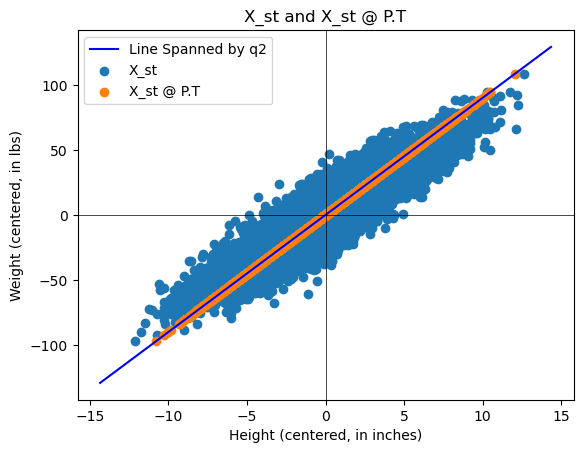

In [46]:
q1 = Q[:,0] # den første søjle
q2 = Q[:,1] # den anden søjle
P = np.outer(q2, q2.T)

# Plotting
t = np.linspace(-130, 130, 2)
fig, ax = plt.subplots()
# ax.plot(t*q1[0], t*q1[1], 'r', label='Line Spanned by q1')
ax.plot(t*q2[0], t*q2[1], 'b', label='Line Spanned by q2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.scatter(X_st[:,0], X_st[:,1], label='X_st')
plt.scatter(X_st @ P[:,0], X_st @ P[:,1], label='X_st @ P.T')
plt.title("X_st and X_st @ P.T")
plt.xlabel("Height (centered, in inches)")
plt.ylabel("Weight (centered, in lbs)")
plt.legend()
plt.show()

*Om Python-plot*: Du kan plotte underrum udspændt af søjler i en matrix ved hjælp af følgende kode:

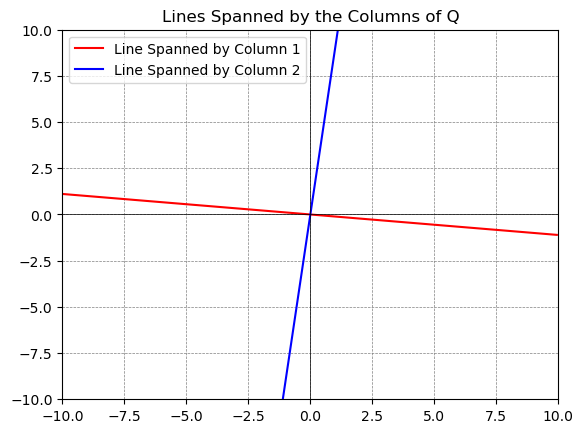

In [47]:
q1 = Q[:,0] # den første søjle
q2 = Q[:,1] # den anden søjle

# Define a range for t, which will be used to extend the lines
t = np.linspace(-10, 10, 2)

# Plotting
fig, ax = plt.subplots()
# For each vector, plot a line that it spans
ax.plot(t*q1[0], t*q1[1], 'r', label='Line Spanned by Column 1')
ax.plot(t*q2[0], t*q2[1], 'b', label='Line Spanned by Column 2')

# Adjust the plot limits and style
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Lines Spanned by the Columns of Q')

# Display the plot
plt.show()

Vores datasæt $X$ (og $X_{st}$) har to komponenter, nemlig 2 egenværdier/egenvektorer. Ved projektionen $X_{st} P^T$ udfører vi en dimensionsreduktion (fra 2 til 1) ned på den vigtigste dimension af datasættet. I dette eksempel er det ikke fornuftigt at lave denne dimensionsreduktion, da både variansen i vægt og højde er vigtig, men vi har lavet den bedste repræsentation hvis vi kun har en "komponent/koordinatvektor".


Hvis dataet $X_{st}$ havde $k$ søjler og $C$-matricen derfor blev $k \times k$ med $k$ egenværdier, bør man lave ortogonal projektion af $X_{st}$ ned på underrummet af $\mathbb{R}^k$ udspændt af egenvektorerne hørende til de "største" egenværdier, da dette er de "vigtigste" komponenter. Hvis egenværdierne for $C$ fx er $1,0.7,0.5,0.01,001$, bør $P$ lave den ortogonale projektion på underrummet udspændt af egenvektorerne hørende til de tre største egenværdier.

### Spørgsmål n

Lad os kigge på nogle datamatricer $Y$ med 3 søjler så vi kan opfatte $Y$ som en punktmængde i $\mathbb{R}^3$. Datamatricen $Y$ i koden nedenfor genereres "tilfældigt", men efter reglerne:

1. $Y$ er standardiseret (hver søjle har nul som gennemsnit),
1. Egenværdierne for $C= \frac{1}{n-1}  Y^T Y$ er omtrentlig lig med $\lambda_1, \lambda_2. \lambda_3$, som angives af brugeren i linjen `eigenvalues = [5, 1, 0.04]`.

In [48]:
# Function to generate a synthetic dataset
def generate_3d_data(eigenvalues, size=1000, dim=3):
    # Eigenvalues specified by the user
    assert len(eigenvalues) == dim, "There must be exactly dim eigenvalues."

    # Create a diagonal matrix for the eigenvalues
    Lambda = np.diag(eigenvalues)

    # Generate a random orthogonal matrix (eigenvectors)
    Q, _ = np.linalg.qr(np.random.randn(dim, dim))

    # Generate random data from a standard normal distribution
    data_standard_normal = np.random.randn(size, dim)

    # Transform the data using the square root of the covariance matrix
    data_transformed = data_standard_normal @ np.sqrt(Lambda) @ Q.T

    # Construct the covariance matrix
    Cov = 1/(size-1) * data_transformed.T @ data_transformed

    return data_transformed, Cov

# Eigenvalues you want for your covariance matrix
eigenvalues = [5, 1, 0.04]

# Generate the data
Y, C = generate_3d_data(eigenvalues)

Vi kan plotte data-matricen $Y \in \mathbb{R}^{1000 \times 3}$ som 1000 datapunkter i $\mathbb{R}^3$:

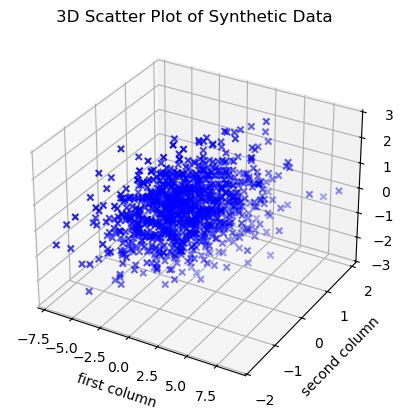

In [49]:
# %matplotlib qt   # plottes i et nyt vindue som kan roteres, fjern #

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[:,0], Y[:,1], Y[:,2], c='b', marker='x')
ax.set_xlabel('first column')
ax.set_ylabel('second column')
ax.set_zlabel('third column')
plt.title('3D Scatter Plot of Synthetic Data')
plt.show()

Vælg forskellige positive $\lambda_1, \lambda_2, \lambda_3$ i `eigenvalues = [5, 1, 0.04]` og undersøg den fremkomne punktmængde ved at rotere plottet (du skal udkommentere `%matplotlib qt`). Prøv både med eksempler hvor $\lambda_1$ er meget større end $\lambda_2, \lambda_3$, og hvor $\lambda_3$ er meget mindre end $\lambda_1$ og $\lambda_2$. Hvordan ændrer punktmængdens form sig med egenværdierne? 

Tænkt på dette (løst formulerede udsagn): Egenværdierne i $C$ er løst sagt givet ved semi-akserne i den ellipsoide der bedst kan "dække" de fleste datapunkter. Retningen på ellipsoidens symmetri-akser bestemmes af egenvektorerne. Ikke vigtige "komponenter" er i retninger, hvor ellipsoiden er "flad".

## Ekstra og valgfrie spørgsmål

### Spørgsmål o

I denne tema-øvelse centrerer vi datasættet ved at trække middelværdien fra hver søjle. Det kan også være nyttigt (eller nødvendigt) at "skalere" dataene, så alle søjler får samme spredning (dvs. at variationen i hver søjle bliver ens). Denne standardisering kaldes samlet z-score normalisering, hvor dataene transformeres, så hver søjle får middelværdi 0 og spredning 1.

Diskuter hvornår kan det være nødvendigt at standardisere dataene på denne måde (inden kovariansmatricen udregnes og PCA udføres)?

```{hint}
:class: dropdown
Overvej følgende punkter i din diskussion:

* Når variablerne måles i forskellige enheder (fx centimeter vs. kilo), kan de med større "enheder" dominere kovariansmålingerne.
* Hvis variablerne har meget forskellige spredninger, kan variablen med størst variation komme til at bestemme de fundne hovedkomponenter, selvom den måske ikke er den vigtigste for problemstillingen.
* Ved at anvende z-score normalisering sikres det, at alle variabler bidrager ligeligt til analysen, da de nu alle har samme mål for spredning.
* Diskuter også, om der kan opstå situationer, hvor det ikke er hensigtsmæssigt at skalere dataene, fx hvis den absolutte varians i variablerne er en vigtig del af fortolkningen af dataene.
```

### Spørgsmål p

Udfør PCA på et eller flere af de "syntetiske" datasæt $Y$ i $\mathbb{R}^3$ fra opgaverne ovenfor.

### Spørgsmål q

Vend tilbage til datasættet $X$. Udfør PCA for hhv mandlige og kvindlige forsøgspersoner:

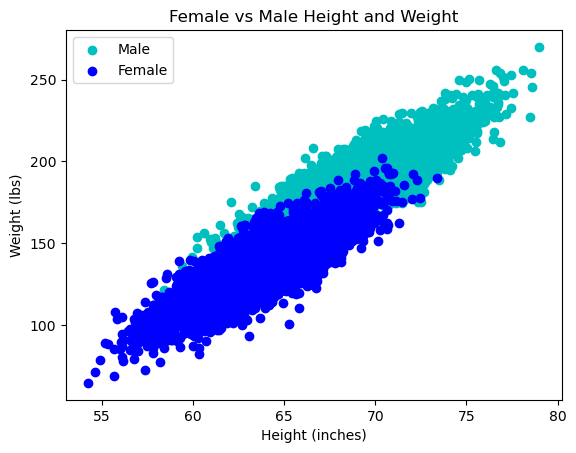

In [50]:
# Filter the data for males
male_data = data[data['Gender'] == '"Male"']
female_data = data[data['Gender'] == '"Female"']

# Access the columns for male data
male_height = male_data['Height']
male_weight = male_data['Weight']
female_height = female_data['Height']
female_weight = female_data['Weight']

# Plot the male weight and height
plt.scatter(x=male_height, y=male_weight, color='c', label='Male')
plt.scatter(x=female_height, y=female_weight, color='b', label='Female')
plt.title("Female vs Male Height and Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.legend()
plt.plot()